In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
data = pd.read_csv(r'Z:\PYTHON COMMON SERVER\BALARAM\adataset.csv')

In [3]:
# first 5 rows of the dataset
data.head()

,collision_type,light,weather,surface,speed,drunk_drive,rate
0,Angle-front-to-side,Dark but lighted,Other,Other,60,yes,High
1,Angle-front-to-side,Dark but lighted,Frog smog smoke,Water,80,yes,Low
2,Sideswipe-same direction,Dark but lighted,unknown,Dry,45,yes,Low
3,Not collision with vehicle in transport,Dark,Snow or blowing snow,Wet,45,yes,High
4,Sideswipe-opposite direction,Dawn,Severe crosswinds,Other,20,no,Low


In [4]:
# last 5 rows of the data
data.tail()

,collision_type,light,weather,surface,speed,drunk_drive,rate
9995,Angle-front-to-side,Unknown,unknown,Other,10,yes,High
9996,Rear-to-side,Unknown,Frog smog smoke,Water,95,yes,Low
9997,Front-to-front,Dusk,Clear cloud no adverse condition,oil,15,yes,High
9998,Sideswipe-same direction,Unknown,Rain mist,oil,20,no,High
9999,Angle-front-to-side,Dusk,Frog smog smoke,Water,35,yes,Low


In [5]:
data.columns

Index(['collision_type', 'light', 'weather', 'surface', 'speed', 'drunk_drive',
       'rate'],
      dtype='object')

In [6]:
#shape of the data set 
data.shape

(10000, 7)

In [7]:
#in collision type feature
data['collision_type'].value_counts()

Angle-front-to-side                        3405
Not collision with vehicle in transport     875
Rear-to-rear                                838
Sideswipe-opposite direction                829
Sideswipe-same direction                    828
Rear-to-side                                820
Front-to-rear                               809
Front-to-front                              805
Other                                       791
Name: collision_type, dtype: int64

In [8]:
#in Light feature
data['light'].value_counts()

Daylight            1706
Dawn                1706
Dusk                1700
Unknown             1686
Dark                1647
Dark but lighted    1555
Name: light, dtype: int64

In [9]:
#in speed type feature
data['speed'].value_counts()

35    708
55    698
95    693
45    692
85    683
20    680
80    674
60    672
25    672
65    665
99    660
5     643
15    632
70    615
10    613
Name: speed, dtype: int64

In [10]:
#in drunk_drive feature
data['drunk_drive'].value_counts()

no     5084
yes    4916
Name: drunk_drive, dtype: int64

In [11]:
#in rate feature
data['rate'].value_counts()

High    5002
Low     4998
Name: rate, dtype: int64

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='drunk_drive', ylabel='count'>

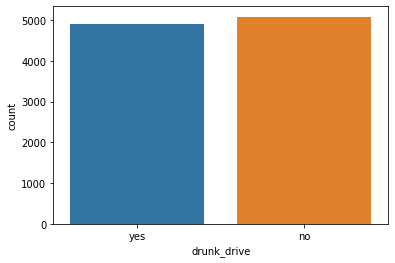

In [12]:
sns.countplot(data.drunk_drive)

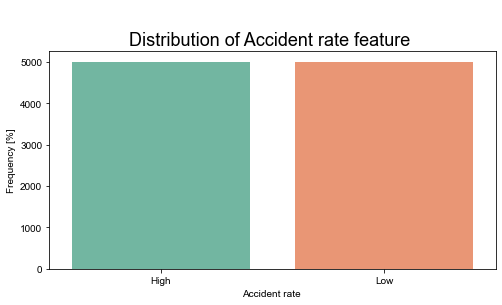

In [13]:
#Distribution of sample data by targets

ax = sns.countplot(x = data.rate ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(data.rate)), (p.get_x()+ 0.3, p.get_height()+1000))

plt.title('Distribution of Accident rate feature ',)
plt.xlabel('Accident rate ')
plt.ylabel('Frequency [%]')
plt.show()

In [14]:
data.isnull().sum()

data.dropna(how='any', axis=0, inplace=True)

data.isnull().sum()

collision_type    0
light             0
weather           0
surface           0
speed             0
drunk_drive       0
rate              0
dtype: int64

In [15]:
#Converting Severity Code from (1/2) tp (0/1)
data.rate.replace(('High', 'Low'), (1, 0), inplace=True)

In [16]:
data.head()

,collision_type,light,weather,surface,speed,drunk_drive,rate
0,Angle-front-to-side,Dark but lighted,Other,Other,60,yes,1
1,Angle-front-to-side,Dark but lighted,Frog smog smoke,Water,80,yes,0
2,Sideswipe-same direction,Dark but lighted,unknown,Dry,45,yes,0
3,Not collision with vehicle in transport,Dark,Snow or blowing snow,Wet,45,yes,1
4,Sideswipe-opposite direction,Dawn,Severe crosswinds,Other,20,no,0


In [17]:
# #Converting Severity Code from (1/2) tp (0/1)
# data.drunk_drive.replace(('yes', 'no'), (0, 1), inplace=True)

In [18]:
data.head()

,collision_type,light,weather,surface,speed,drunk_drive,rate
0,Angle-front-to-side,Dark but lighted,Other,Other,60,0,1
1,Angle-front-to-side,Dark but lighted,Frog smog smoke,Water,80,0,0
2,Sideswipe-same direction,Dark but lighted,unknown,Dry,45,0,0
3,Not collision with vehicle in transport,Dark,Snow or blowing snow,Wet,45,0,1
4,Sideswipe-opposite direction,Dawn,Severe crosswinds,Other,20,1,0


In [19]:
data['weather'].value_counts()

Other                               1288
unknown                             1278
Severe crosswinds                   1269
Rain mist                           1258
Snow or blowing snow                1255
Clear cloud no adverse condition    1252
Frog smog smoke                     1218
Blowing sand soil dirt              1182
Name: weather, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lable_ncoder = LabelEncoder()

In [22]:
data['weather'] = lable_ncoder.fit_transform(data['weather'])

In [23]:
data['collision_type'] = lable_ncoder.fit_transform(data['collision_type'])

In [24]:
data['light'] = lable_ncoder.fit_transform(data['light'])

In [25]:
data['surface'] = lable_ncoder.fit_transform(data['surface'])

In [ ]:
data['rate'] = lable_ncoder.fit_transform(data['rate'])

In [ ]:
data['drunk_drive'] = lable_ncoder.fit_transform(data['drunk_drive'])

In [26]:
data.head()

,collision_type,light,weather,surface,speed,drunk_drive,rate
0,0,1,3,2,60,0,1
1,0,1,2,5,80,0,0
2,8,1,7,0,45,0,0
3,3,0,6,6,45,0,1
4,7,2,5,2,20,1,0


In [27]:
x=data[["collision_type","light","weather","surface","speed","drunk_drive"]].values
y=data[["rate"]].values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Test/Train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8000, 6) (8000, 1)
Test set: (2000, 6) (2000, 1)


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [31]:
etc = ExtraTreesClassifier(random_state=0)
cv_score = cross_val_score(etc, x, y, cv=5).mean()
print("The avergae Cross validation score is ", cv_score)

c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector 

The avergae Cross validation score is  0.5025999999999999


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {'n_estimators':[50, 100, 500, 1000], 'max_depth':[5, 10, 50, 100, 500]}
etc = ExtraTreesClassifier()
clf = GridSearchCV(etc, parameters, cv=5)
clf.fit(x,y)

c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [5, 10, 50, 100, 500],
                         'n_estimators': [50, 100, 500, 1000]})

In [34]:
clf.best_estimator_

ExtraTreesClassifier(max_depth=500, n_estimators=50)

In [35]:
clf.best_score_

0.5069999999999999

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

c:\program files\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [39]:
cm

array([[484, 525],
       [494, 497]], dtype=int64)

In [40]:
ac

0.4905

In [41]:
!pip install mlxtend
from mlxtend.classifier import StackingClassifier

In [42]:
!pip install lightgbm

In [43]:
model1 = ExtraTreesClassifier()
model2 = KNeighborsClassifier()

import lightgbm as lgb
lr = lgb.LGBMClassifier()
# lr = LGBMClassifier()
clf_stack = StackingClassifier(classifiers=[model1, model2], meta_classifier=lr, use_probas=True,
                                         use_features_in_secondary=True)
model_stack = clf_stack.fit(x_train, y_train)
pred_stack = model_stack.predict(x_test)
acc_stack = accuracy_score(y_test, pred_stack)

c:\program files\python36\lib\site-packages\mlxtend\classifier\stacking_classification.py:189: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
c:\program files\python36\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [44]:
pred_stack = model_stack.predict(x_test)
acc_stack = accuracy_score(y_test, pred_stack)

In [45]:
acc_stack

0.513